## Tarea: Resolver un problema multivariable con Algoritmo genético
### Eliuth Montiel Navarrete

In [5]:
import random
import math
import copy
import matplotlib.pyplot as plt

#Función para generar una población inicial.
def GenerarPoblacion(longitud, tamPoblacion):
    poblacionInicial = [[] for _ in range(tamPoblacion)]
    for i in range(tamPoblacion):
        for j in range(longitud):
            poblacionInicial[i].append(random.randint(0,1))
    return poblacionInicial

#Función para separar un cromosoma en 2 valores binarios.
def Separacion(cromosoma, bits = 10):
    tam = int(len(cromosoma)/bits)
    valores = []

    for i in range(tam):
        valores.append('')
        for j in range(bits):
            valores[i] += str(cromosoma[(i*bits)+j])
    return valores

#Conversiones de cromosomas Binarios.
def Mapeo(cromosoma, superior = 512, inferior = -512, nBits = 10):
    valorReal = 0
    l = inferior
    u = superior
    n = nBits
    for i in range(len(cromosoma)):       
        valorReal += int(int(cromosoma[-(i+1)]) * math.pow(2,i))
    fenotipo = l + (valorReal/(math.pow(2,n)-1)) * (u-l)
    return fenotipo

#Evaluación de la función de aptitud.
def Aptitud(cromosoma):
    x,y = Separacion(cromosoma)
    x = Mapeo(x)
    y = Mapeo(y)
    aptitud = 20 + math.pow(x,2) + math.pow(y,2) - math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y)
    return aptitud

#Creamos una población inicial de 4 cromosomas con un un tamaño de 20 bits.

nCromosomas = 20
nBits = 20
poblacionInicial = GenerarPoblacion(nBits, nCromosomas)
#poblacionInicial = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
#print(f'Población inicial: {poblacionInicial}')
for i in range(len(poblacionInicial)):
    x, y = Separacion(poblacionInicial[i])
    print(f'Cromosoma {i}: {poblacionInicial[i]}\nX: {Mapeo(x)}, Y: {Mapeo(y)}\nAptitud: {Aptitud(poblacionInicial[i])}\n')

Cromosoma 0: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
X: -251.74584555229717, Y: 5.505376344086017
Aptitud: 63425.30659224068

Cromosoma 1: [0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1]
X: -199.6950146627566, Y: 27.526881720430083
Aptitud: 40655.18097985038

Cromosoma 2: [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
X: -151.6480938416422, Y: 212.70772238514178
Aptitud: 68262.05443530453

Cromosoma 3: [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
X: 459.9491691104595, Y: 503.9921798631476
Aptitud: 465581.40489141113

Cromosoma 4: [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0]
X: -272.7663734115347, Y: 482.9716520039101
Aptitud: 307683.99258695164

Cromosoma 5: [0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0]
X: -90.5884652981427, Y: 472.9618768328446
Aptitud: 231921.0278862099

Cromosoma 6: [1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]
X: 445.9354838709677, Y: 35.53470185728247
Apti

<h3>Funciones</h3>

In [6]:
#Probabilidades de ruleta.
def ProbabilidadesRuleta(poblacion):
    aptitudTotal = 0
    probabilidades = []
    for i in range(len(poblacion)):
        x,y = Separacion(poblacionInicial[i])
        aptitudTotal += Aptitud(poblacionInicial[i])
        
    for i in range(len(poblacion)):
        #Al sacar el inverso de la probabilidad hacemos que mejoren aquellos valores con menor aptitud.
        probabilidades.append(1-(Aptitud(poblacionInicial[i])/aptitudTotal))
    return probabilidades

#Selección por ruleta
def Ruleta(poblacion):
    padres = []
    poblacionAux = copy.deepcopy(poblacion)

    while(len(padres) < len(poblacion)/2):
        probabilidades = ProbabilidadesRuleta(poblacionAux)
        r = random.randrange(0,100)/100
        ultimo = 0
        #print(f'Padres: {len(padres)}\nPoblacion: {poblacionAux}\nProbabilidades: {probabilidades}\nr: {r}')
        for i in range(len(probabilidades)):
            #print(f'Elemento: {i}: {poblacionAux[i]}')
            if (r >= ultimo and r<(probabilidades[i] + ultimo)):
                #print(f'Elemento: {i}: {poblacionAux[i]} seleccionado\n')
                padres.append(poblacionAux.pop(i))
                break
            ultimo = probabilidades[i]
    return padres

#Selección por torneo.
def Torneo(poblacion, t=2):
    padres = []
    competidores = []
    poblacionAux = copy.deepcopy(poblacion)

    while(len(padres) < len(poblacion)/2):
        for i in range(t):
            if(len(poblacionAux) > 0):
                indice = random.randint(0,len(poblacionAux)-1)
                competidores.append(poblacionAux.pop(indice))
            else:
                break

        mejor = copy.deepcopy(competidores[0])
        for i in range(len(competidores)-1):
            if(Aptitud(mejor) > Aptitud(competidores[i+1])):
                mejor = copy.deepcopy(competidores[i+1])
        padres.append(copy.deepcopy(mejor))
        competidores = []
    return padres

#Cruce uniforme.
def CruceUniforme(cromosoma1, cromosoma2):
    hijos = []
    hijo1 = []
    hijo2 = []
    for i in range(len(cromosoma1)):
        if(random.randint(0,1) == 0):
            hijo1.append(copy.deepcopy(cromosoma1[i]))
            hijo2.append(copy.deepcopy(cromosoma2[i]))
        else:
            hijo1.append(copy.deepcopy(cromosoma2[i]))
            hijo2.append(copy.deepcopy(cromosoma1[i]))
    hijos.append(hijo1)
    hijos.append(hijo2)

    return hijos

#Mutación de un bit.
def Mutacion1Bit(cromosoma):
    mutado = copy.deepcopy(cromosoma)
    i = random.randint(0,len(cromosoma)-1)
    #print(f'Bit a mutar: {i}')
    if mutado[i] == 0:
        mutado[i] = 1
    else:
        mutado[i] = 0

    return mutado

<h3>Algoritmo genético</h3>


###Generación 0###
Támaño de la población: 20
Aptitud mínima: 0.6057921758498801

###Generación 1###
Támaño de la población: 20
Aptitud mínima: 0.6057921758498801

###Generación 2###
Támaño de la población: 20
Aptitud mínima: 0.5256341878960122

###Generación 3###
Támaño de la población: 20
Aptitud mínima: 0.3853629897343037

###Generación 4###
Támaño de la población: 20
Aptitud mínima: 0.3853629897343037

###Generación 5###
Támaño de la población: 20
Aptitud mínima: 0.3853629897343037

###Generación 6###
Támaño de la población: 20
Aptitud mínima: 0.3853629897343037

###Generación 7###
Támaño de la población: 20
Aptitud mínima: 0.3853629897343037

###Generación 8###
Támaño de la población: 20
Aptitud mínima: 0.3853629897343037

###Generación 9###
Támaño de la población: 20
Aptitud mínima: 0.3853629897343037

###Generación 10###
Támaño de la población: 20
Aptitud mínima: 0.3853629897343037

###Generación 11###
Támaño de la población: 20
Aptitud mínima: 0.3853629897343037

###Generación

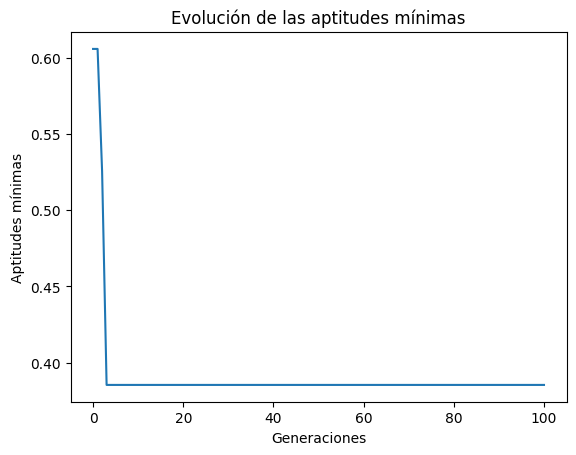

In [7]:
poblacionActual = poblacionInicial
generacion = 0
generaciones = []
aptitudes = []
aptitudesMinimas = []
padresCruzados = [0,0]

while(generacion <= 100):
    aptitudes = []
    print(f'\n###Generación {generacion}###')
    print(f'Támaño de la población: {len(poblacionActual)}')
    generacion += 1

    #Selección de los padres de la generación.
    padres = Torneo(poblacionActual,2)
    #padres = Ruleta(poblacionActual)
    if (len(padres) == 1):
        minimo = copy.deepcopy(padres)

    #Cruce de padres
    for i in range(math.floor(len(padres)/2)):
        padresCruzados[0], padresCruzados[1] = CruceUniforme(padres[(i*2)], padres[(i*2)+1])
        padres.append(copy.deepcopy(padresCruzados[0]))
        padres.append(copy.deepcopy(padresCruzados[1]))
    
    
    #Mutación de hijos y selección de mejores candidatos.
    for i in range(len(padres)-1):
        hijos = CruceUniforme(padres[i], padres[i+1])
        if(Aptitud(hijos[0]) < Aptitud(padres[i]) and Aptitud(hijos[0]) < Aptitud(padres[i])):
            if(Aptitud(padres[i]) < Aptitud(padres[i+1])):
                padres[i+1] = hijos[0]
            else:
                padres[i] = hijos[0]
        if(Aptitud(hijos[1]) < Aptitud(padres[i]) and Aptitud(hijos[0]) < Aptitud(padres[i])):
            if(Aptitud(padres[i]) < Aptitud(padres[i+1])):
                padres[i+1] = hijos[1]
            else:
                padres[i] = hijos[1]
        #padres[i] = Mutacion1Bit(padres[i])
    
    poblacionActual = padres
    generaciones.append(generacion-1)
    for i in range(len(poblacionActual)):
        aptitudes.append(Aptitud(poblacionActual[i]))
    aptitudesMinimas.append(min(aptitudes)/100)
    print(f'Aptitud mínima: {aptitudesMinimas[-1]}')

print(f'\n\nMínimo local encontrado:\nCromosoma: {poblacionActual[0]}')
x, y = Separacion(poblacionActual[0])
print(f'\nX: {Mapeo(x)/100}, Y: {Mapeo(y)/100}\nAptitud: {Aptitud(poblacionActual[0])/100}\n')
plt.plot(generaciones, aptitudesMinimas)
plt.xlabel('Generaciones')
plt.ylabel('Aptitudes mínimas')
plt.title('Evolución de las aptitudes mínimas')
plt.show()

<h3><strong>Explicación del AG</strong></h3>

El funcionamiento del algoritmo genético es el siguiente:
Primero se crean varios cromosomas de manera aleatoria, con el fin de tener una población inicial diversa. Posteriormente se aplicó una selección por torneo a esta población con el fin de seleccionar a la mitad más apta, este nuevo grupo se convirtió en el grupo de padres, a este grupo se le realizó un cruce uniforme con el fin de mantener a la población en número inicial de cromosomas.

Este último grupo recibió mutaciones y se fue comparando para determinar si nos quedabamos con los cromosomas mutados o si consevabamos a los padres.

Finalmente se fue iterando durante 100 generaciones hasta llegar a las 100 generaciones.

<br>
<br>

<h3><strong>Cuestionario</strong></h3>
<strong><em>¿Dónde se ocalizó el mínimo?</em></strong>
<br>
El mínimo se localizó en los punto X = -0.02 y Y = 0.03, su aptitud fue de 0.38.

<strong><em>¿Cómo fue la evolución de la aptitud?</em></strong>
<br>
Extremadamente rápida, a partir de la tercera generación el valor convergió al mínimo encontrado. No hubo algún tipo de mutación que moviera la evoluvión a algún otro mínimo.

<strong><em>¿Qué estrategias ayudaron a evitar óptimos locales?</em></strong>
Al final evité utilizar funciones que involucraran probabilidades para evitar los mínimos locales, esto debido a que el consumo de recursos era muchísimo mayor y los valores no convergían a una solución viable, es decir no se encontraba un mínimo para la función. Estas funciones eran la selección por ruleta y las mutaciones de los cromosomas como la mutación de 1 bit y el cruce uniforme.

<br>
<br>

<h3><strong>Reflexión</strong></h3>
Se probaron diferentes técnicas para el algoritmo, en un principio se utilzaron funciones que creaban una gran diversidad en los cromosomas, sin embargo esta diversidad evitaba que se llegara una solución oṕtima, por lo cuál se decidió darle más importancia a la aptitud, con el fin de converger de manera rápida a una solución, de igual forma se probaron diferentes números de población inicial, ya que se observó que con una gran cantidad de estos el problema prácticamente encuentra una solución en la primera generación.

Es interesante ver en acción estos algoritmos ya que permiten observar los problemas que se encuentran al programarlos y sobre todo a darles solución.